# Approximation of the Minions location base on the Logfile

## If first time you run this notebook

In [ ]:
!conda install -c conda-forge ipyleaflet
!pip install utm

In [ ]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet

*Then restart jupyterlab or notebook*

## Importing functions

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map, WMSLayer, basemaps, Marker, MarkerCluster

## Defining local module to the path

In [3]:
src = os.path.abspath('./PyMod/')
if src not in sys.path:
    sys.path.append(src)

## Importing local modules

**Python module to extract temperature and location data :**

In [4]:
from LogExtract import nodes_gnss_temp

## Extracting data from LogFile from 1 file

In [5]:
path = "E:/GitHub/Minions-Toolbox/ExampleData/453001250/20231110162230/DigiSolo.LOG"
stt = '2023-11-10T11:15:00'
end = '2023-11-10T13:00:00'

In [6]:
TEMP, TEMPUTC, GNSSUTC, LAT, LONG, ALTI, COMPASS, TILT = nodes_gnss_temp(path, startdate=stt, enddate=end)

Text(0, 0.5, 'Latitude (m)')

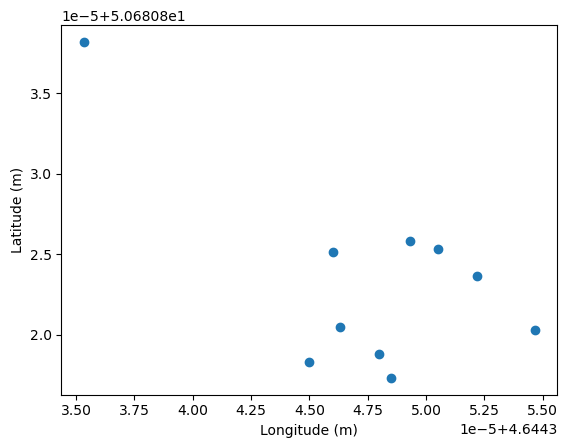

In [7]:
fig, ax = plt.subplots()
ax.scatter(LONG, LAT)
ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')

### Median position => Approximate the location of the geophones

In [8]:
approxPos = [np.median(LONG), np.median(LAT)]

Text(0, 0.5, 'Latitude (m)')

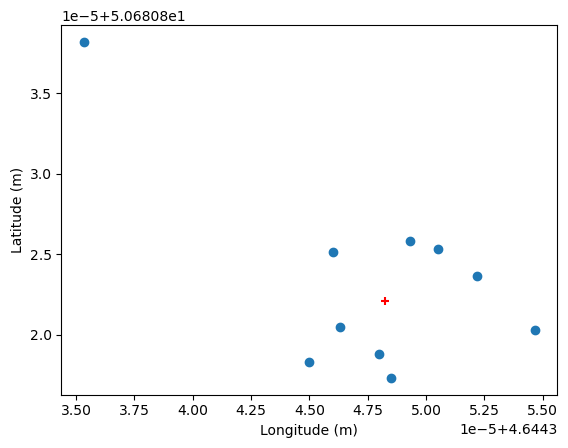

In [9]:
fig, ax = plt.subplots()
ax.scatter(LONG, LAT)
ax.scatter(approxPos[0],approxPos[1], c='r', marker='+')
ax.set_xlabel('Longitude (m)')
ax.set_ylabel('Latitude (m)')

### Showing on a map

In [10]:
m = Map(basemap=basemaps.CartoDB.Positron, center=(approxPos[1],approxPos[0]), zoom=15)

marker1 = Marker(location=(approxPos[1],approxPos[0]), draggable=False)
marker_cluster = MarkerCluster(markers=(marker1,))

m.add_layer(marker_cluster)

m

Map(center=[50.680822083500004, 4.64434825], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

## For multiple geophones

In [11]:
base = 'E:/PhD/Supervision/Martin/DATA/ch_logfile/'
stt = '2023-11-10T11:30:00'
end = '2023-11-10T13:00:00'

In [12]:
dirLog = os.listdir(base)
dirLog

['453000390',
 '453001250',
 '453003484',
 '453003625',
 '453004444',
 '453004465',
 '453004512',
 '453004639',
 '453004744',
 '453004823',
 '453013956',
 '453019524',
 '453020066']

In [15]:
PosNodes = []

for nodes in dirLog :
    path = '%s/%s' %(base,nodes)
    for folder in os.listdir(path) :
        if folder.startswith('20231110') :
            path = '%s/%s/%s/DigiSolo.LOG' %(base,nodes,folder)
            TEMP, TEMPUTC, GNSSUTC, LAT, LONG, ALTI, COMPASS, TILT = nodes_gnss_temp(path, startdate=stt, enddate=end)
            MdLat = np.median(LAT)
            MdLong = np.median(LONG)
            PosNodes.append([nodes,MdLat, MdLong])

In [16]:
from ipyleaflet import Map, WMSLayer, basemaps, Marker, MarkerCluster

m = Map(basemap=basemaps.CartoDB.Positron, center=(approxPos[1],approxPos[0]), zoom=15)

markers = []

for pos in PosNodes :
    markers.append(Marker(location=(pos[1],pos[2]), draggable=False))

marker_cluster = MarkerCluster(markers=markers)

m.add_layer(marker_cluster)

m

Map(center=[50.680822083500004, 4.64434825], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_…

### Visualize the serial numbers

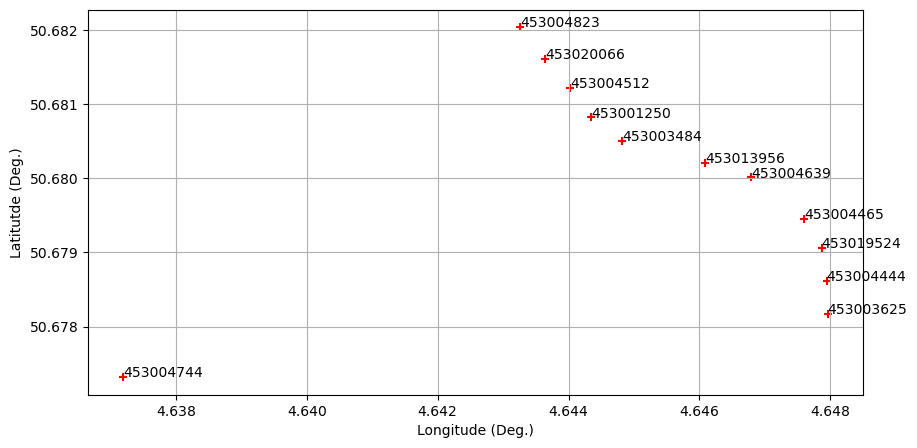

In [27]:
fig = plt.figure(figsize=(10,5))
for node in PosNodes :
    plt.scatter(node[2],node[1], c='r', marker='+')
    plt.text(node[2],node[1], node[0])
    
plt.xlabel('Longitude (Deg.)')
plt.ylabel('Latitutde (Deg.)')

plt.grid()